## Atividade 1 - Desenvolvimento de um Classificador Binário por Limiar
#
### Caio Eduardo Theodoro - RA: 2044560



| Biblioteca | Função |
| ------ | ----------- |
| numpy   | será utilizada para realizar operações matemáticas |
| pandas  | será utilizada para ler os arquivos csv |
| matplotlib.pyplot e seaborn | será utilizada para plotar os gráficos |
| sklearn | será utilizada para realizar a separação dos dados em treino e teste, e para realizar a classificação dos dados |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

### Renomeando as colunas do dataset
#### Faremos a leitura do dataset e renomearemos as colunas para facilitar o entendimento 

In [2]:
colunas = ['tamanho de sépala (cm)', 'largura de sépala (cm)', 'tamanho de pétala (cm)', 'largura de pétala (cm)', 'especie']
plt.tight_layout()
df = pd.read_csv('iris_2class.csv')
df = df.rename(columns={'sepal length (cm)': colunas[0], 'sepal width (cm)': colunas[1], 'petal length (cm)': colunas[2], 'petal width (cm)': colunas[3]})

<Figure size 640x480 with 0 Axes>

In [3]:
df.head(4)

tamanho de sépala (cm)  largura de sépala (cm)  tamanho de pétala (cm)  \
0                     7.0                     3.2                     4.7   
1                     6.4                     3.2                     4.5   
2                     6.9                     3.1                     4.9   
3                     5.5                     2.3                     4.0   

   largura de pétala (cm)     especie  
0                     1.4  versicolor  
1                     1.5  versicolor  
2                     1.5  versicolor  
3                     1.3  versicolor

## Estatisticas descritivas dos dados agrupados pela classe ((especie) versicolor e virginica)

#### Abaixo, podemos ver as estatísticas de cada classe, sendo eles:
-  count: quantidade de amostras
-  mean: média
-  std: desvio padrão
-  min: valor mínimo
-  25%: primeiro quartil
-  50%: mediana
-  75%: terceiro quartil
-  max: valor máximo



#### De cara, podemos ver que a quantidade de amostras para cada espécie é igual, e que a classe virginica possui valores maiores que a classe versicolor em todos os atributos.

In [4]:

df.groupby('especie').describe()

tamanho de sépala (cm)                                              \
                            count   mean       std  min    25%  50%  75%  max   
especie                                                                         
versicolor                   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica                    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           largura de sépala (cm)         ... tamanho de pétala (cm)       \
                            count   mean  ...                    75%  max   
especie                                   ...                               
versicolor                   50.0  2.770  ...                  4.600  5.1   
virginica                    50.0  2.974  ...                  5.875  6.9   

           largura de pétala (cm)                                            
                            count   mean       std  min  25%  50%  75%  max  
especie                                                                      
versicolor                   50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica                    50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[2 rows x 32 columns]

### Histograma e Boxplot dos atributos agrupados pela classe (especie) versicolor e virginica

#### Abaixo, vemos os histogramas de cada atributo agrupados pela classe, sendo eles:
- tamanho da sépala
- largura da sépala
- tamanho da pétala
- largura da pétala

#### Além das considerações feitas anteriormente sobre os valores de cada atributo, podemos ver que:
- tamanho e largura da sépala e possuem distribuição normal (isto é, a curva é simétrica em relação à média)
- tamanho e largura da pétala possuem distribuição bimodal (isto é, a curva possui dois picos)
- a distribuição dos dados da sépalaestão mais próximos da média
### Quanto ao boxplot:
- para a largura da sépala, a distribuição dos dados é mais cruzada, onde a largura das duas classes possuem valores próximos
- para a largura e tamanho da pétala e tamanho da sépalas, a distribuição dos dados é mais separada, onde os valores da classe virginica são maiores que os valores da classe versicolor


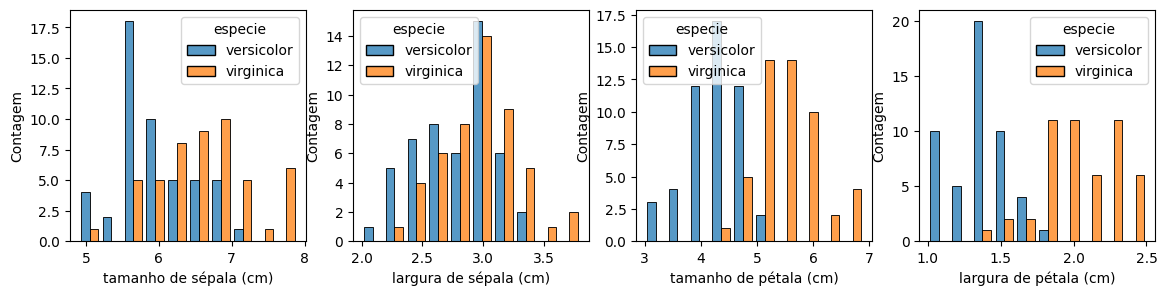

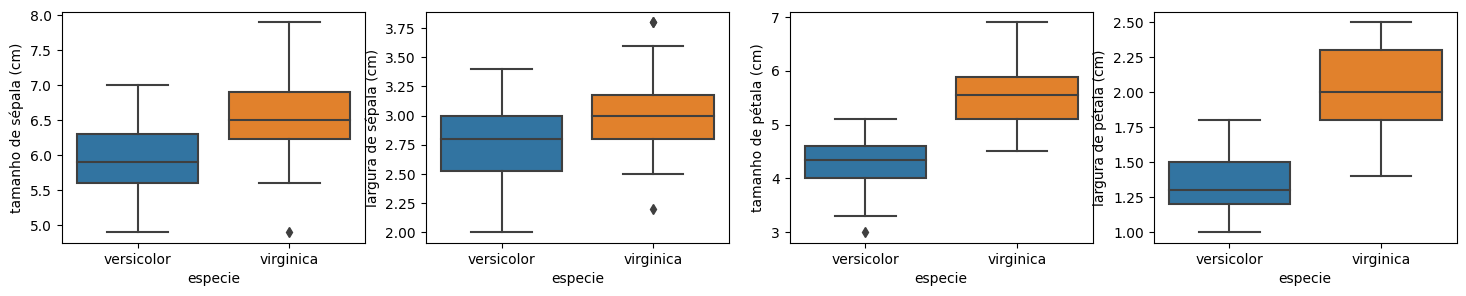

In [5]:
fig2, ax2 = plt.subplots(1, 4, figsize=(14, 3))
fig1, ax1 = plt.subplots(1, 4, figsize=(18, 3))

for i in range(4):
    sns.boxplot(x=colunas[4], y=colunas[i], data=df, ax=ax1[i])
    ax1[i].set_xlabel(colunas[4])
    ax1[i].set_ylabel(colunas[i])

    sns.histplot(data=df, bins=10, x=colunas[i], hue=colunas[4], multiple='dodge', shrink=0.8, ax=ax2[i])
    ax2[i].set_xlabel(colunas[i])
    ax2[i].set_ylabel('Contagem')

    



### Gráfico de dispersão dos atributos agrupados pela classe (especie) versicolor e virginica

#### Abaixo, vemos os gráficos de dispersão de cada atributo agrupados pela classe, sendo eles:

- tamanho da sépala x largura da sépala
- tamanho da sépala x tamanho da pétala

### Quanto aos dados de tamanho e largura da pétala, vemos que:
- os dados da classe virginica estão mais dispersos que os dados da classe versicolor
- podemos traçar uma reta que separa os dados das duas classes e perceber os outliers
- os dados da classe versicolor estão mais próximos da reta que separa os dados das duas classes



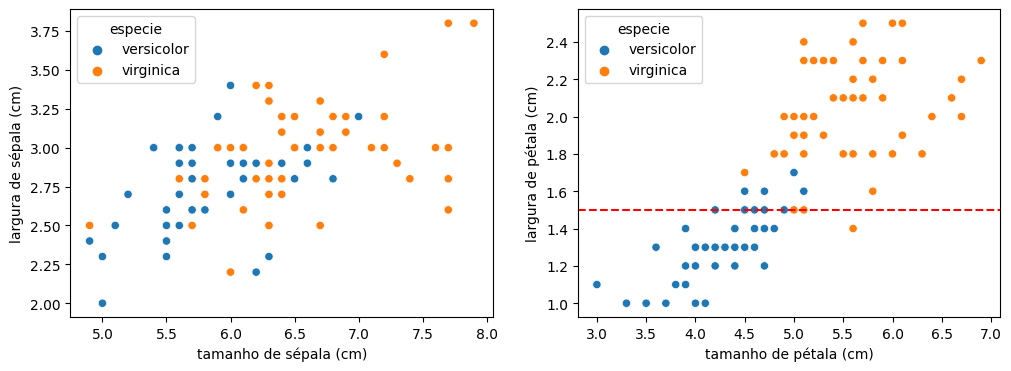

In [6]:
fig3, ax3 = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df, x=colunas[0], y=colunas[1], hue=colunas[4], ax=ax3[0])
ax3[0].set_xlabel(colunas[0])
ax3[0].set_ylabel(colunas[1])

sns.scatterplot(data=df, x=colunas[2], y=colunas[3], hue=colunas[4], ax=ax3[1])
ax3[1].set_xlabel(colunas[2])
ax3[1].set_ylabel(colunas[3])

limiar = 1.5

plt.axhline(y=limiar, color='r', linestyle='--')

    
    

### Funções auxiliares e classificador

In [7]:
def classificador_limiar(limiar, dados, coluna, rotulos=["versicolor", "virginica"]):
    predicoes = []
    for idx, dado in dados.iterrows():
        if dado[0] < limiar:
            predicoes.append(rotulos[0])
        else:
            predicoes.append(rotulos[1])
    return predicoes

def busca_exaustiva_classificador_por_linear(n_limiares, x_treino, y_treino, coluna, df = df):
    limiares = np.linspace(df[coluna].min(), 
                           df[coluna].max(), n_limiares)
    acuracias = []

    melhor_limiar = limiares[0]
    melhor_acuracia = 0

    for limiar in limiares:
        predicoes = classificador_limiar(limiar, x_treino, coluna)
        acuracia = accuracy_score(y_treino, predicoes)
        acuracias.append(acuracia)

        if acuracia > melhor_acuracia:
            melhor_acuracia = acuracia
            melhor_limiar = limiar
            
    return melhor_limiar, melhor_acuracia

### Separando os dados em treino e teste utilizando os dados de tamanho e largura da pétala

#### Como os dados de pétala estão mais separados, acreditamos que eles sejam mais fáceis de classificar



In [8]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
    df[[colunas[2], colunas[3]]], ## tamanho de pétala e largura de pétala
    df[colunas[4]], ## espécie
    test_size=0.2,  ## 20% dos dados para teste
    stratify=df[colunas[4]].tolist(), ## estratificação por espécie
    random_state=42, ## semente para geração de números aleatórios
    shuffle=True) ## embaralhamento dos dados

### Classificando os dados

In [9]:
melhor_limiar, melhor_acuracia = busca_exaustiva_classificador_por_linear(100, X_treino, y_treino, colunas[0])
print(f"Melhor limiar: {melhor_limiar}")
print(f"Acurácia: {melhor_acuracia}")

Melhor limiar: 4.9
Acurácia: 0.9375


### Busca exausitiva em 20 partições

#### Abaixo, vemos os resultados da busca exausitiva em 20 partições, os limiares foram escolhidos pegando

In [11]:
acuracias = []
melhor_acc = 0
pior_acc = 999

for i in range(20):
    X_treino, X_teste, y_treino, y_teste = train_test_split(
        df[[colunas[2], colunas[3]]], ## tamanho de pétala e largura de pétala
        df[colunas[4]], ## espécie
        test_size=0.2,  ## 20% dos dados para teste
        stratify=df[colunas[4]].tolist(), ## estratificação por espécie
        random_state=i, ## semente para geração de números aleatórios
        shuffle=True) ## embaralhamento dos dados
    melhor_limiar, melhor_acuracia = busca_exaustiva_classificador_por_linear(100, X_treino, y_treino, colunas[0])
    acuracias.append(melhor_acuracia)
    
    if melhor_acuracia > melhor_acc:
        melhor_acc = melhor_acuracia
    if melhor_acuracia < pior_acc:
        pior_acc = melhor_acuracia
        


print("Melhor acurácia: ", melhor_acc)
print("Pior acurácia: ", pior_acc)


Melhor acurácia:  0.9625
Pior acurácia:  0.9125


## Conclusão
### Através dos resultados obtidos, podemos concluir que:


In [12]:
print(f"Acurácia média: {np.mean(acuracias)}")
print(f"Acurácia mediana: {np.median(acuracias)}")
print(f"Desvio padrão: {np.std(acuracias)}")

Acurácia média: 0.93
Acurácia mediana: 0.925
Desvio padrão: 0.01391941090707505
